## NN regression

Simple NN example doing linear regression for the sake of intuition

In [1]:
# example of training a final regression model
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from keras_visualizer import visualizer 

In [2]:
# generate regression dataset
n_train=5000
n_test=5000

In [3]:
def f(x):
    """ Function we want our neural network to learn"""
    return np.sin(2*x[:,0])+np.cos(3*x[:,1])+3

In [4]:
x_train=np.random.uniform(size=(n_train,2))
x_test=np.random.uniform(size=(n_test,2))

In [5]:
y_train=f(x_train)
y_test=f(x_test)

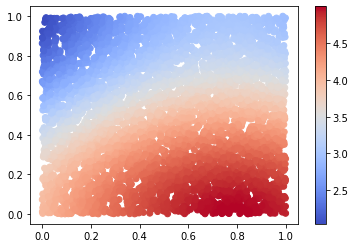

In [6]:
sc=plt.scatter(x_train[:,0],x_train[:,1],c=y_train, cmap=plt.cm.coolwarm)
plt.colorbar(sc)

In [7]:
# define and fit the final model
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam')
model.fit(x_train, y_train, epochs=1000, verbose=0)

In [8]:
y_predict=model.predict(x_test)

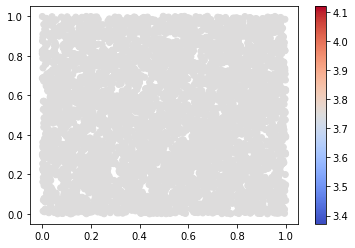

In [9]:
sc=plt.scatter(x_test[:,0],x_test[:,1],c=y_predict, cmap=plt.cm.coolwarm)
plt.colorbar(sc)

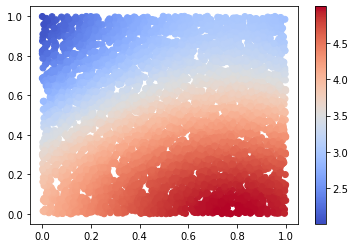

In [10]:
sc=plt.scatter(x_test[:,0],x_test[:,1],c=y_test, cmap=plt.cm.coolwarm)
plt.colorbar(sc)

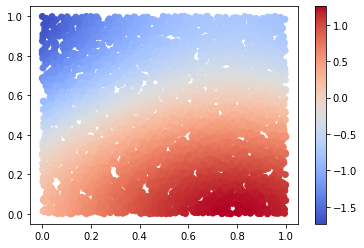

In [11]:
sc=plt.scatter(x_test[:,0],x_test[:,1],c=y_test-y_predict.squeeze(), cmap=plt.cm.coolwarm)
plt.colorbar(sc)

In [12]:
model.layers

In [14]:
model.layers[0].weights

[<tf.Variable 'dense/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[ 0.19948792,  0.62368345, -0.15955901,  0.7911687 ],
        [ 0.38494253,  0.45919085, -0.93145347,  0.8007107 ]],
       dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>]

In [15]:
model.layers[1].weights

[<tf.Variable 'dense_1/kernel:0' shape=(4, 6) dtype=float32, numpy=
 array([[-0.21192366, -0.10180813, -0.35260487,  0.28755546, -0.18193853,
         -0.5932188 ],
        [ 0.43536198,  0.16569906,  0.23921692,  0.5072721 , -0.6424871 ,
         -0.06362647],
        [-0.29953   ,  0.08038658,  0.28367758, -0.70716214, -0.45940614,
         -0.05697709],
        [-0.47045046, -0.28264746, -0.43176535, -0.6242784 , -0.76081765,
         -0.63457125]], dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(6,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0.], dtype=float32)>]

In [13]:
model.layers[-1].weights

[<tf.Variable 'dense_2/kernel:0' shape=(6, 1) dtype=float32, numpy=
 array([[-0.72564316],
        [ 0.46318603],
        [-0.79378134],
        [-0.72261643],
        [ 0.7299285 ],
        [ 0.34620488]], dtype=float32)>,
 <tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([3.7460291], dtype=float32)>]